JURNAL MODUL 3

EKUALISASI DAN SPESIFIKASI HISTOGRAM

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fungsi diatas merupakan fungsi untuk memanggil library yang sudah ada dalam python,
cv2 library python yang berfungsi untuk membaca, menampilkan, dan menyimpan gambar,
matplotlib library python yang berfungsi untuk memvisualisasikan data,
numpy library python yang berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array multidimensi.

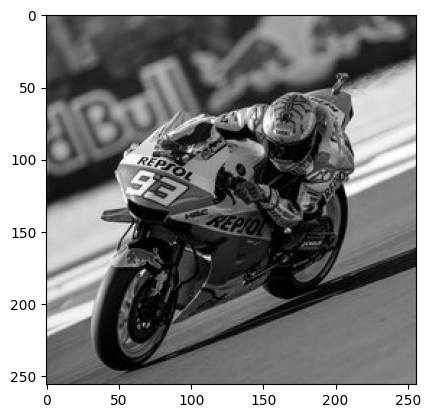

In [27]:
img = cv2.imread("marc.jpg") 
img2 = cv2.imread("haechan.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

pada fungsi diatas merupakan fungsi untuk mengubah atau konversi warna gambar yang awalnya RGB menjadi GRAY dengan fungsi yang sudah disediakan oleh library cv2, kemudian menampilkan gambar tersebut dengan fungsi yang sudah disediakan oleh library matplotlib.

In [28]:
tinggi,panjang= gray.shape

Kode tinggi, panjang = gray.shape digunakan untuk mendapatkan tinggi dan panjang dari citra grayscale gray. Hasil dari gray.shape adalah tuple yang berisi dua nilai, yaitu tinggi dan panjang citra tersebut.

NOMOR 1

Tampilkan histogram dari citra 1

In [29]:
def histo (img):
    abu=np.zeros(256).astype(int)
    for i in range(tinggi):
        for j in range(panjang):
            x=gray[i,j]
            abu[x]+=1
    histogram=np.arange(256)
    plt.bar(histogram, abu)
    return abu, histogram

Fungsi histo(img) digunakan untuk menghitung dan menampilkan histogram dari citra grayscale img. pada langkah pertama membuat aray dengan 256 element yang bernilai 0 kemudian melakukan perulangan untuk mengambil nilai piksel pada posisi i dan j dari menyimpannya pada variabel baru. setelah itu akan menambahkan 1 ke dalam elemen ke x dari array yang menandakan bahwa ada 1 piksel pada citra tersebut yang mempunyai nilai ke x.

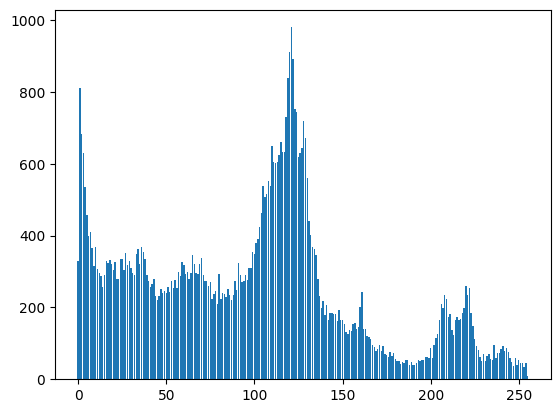

In [30]:
hist, x = histo(gray)
plt.show()

hist, x = histo(gray) memanggil fungsi histo(gray) untuk menghitung dan menyimpan histogram dari citra tersebut pada variabel hist dan x. Kemudian, plt.show() digunakan untuk menampilkan histogram pada plot.

NOMOR 2

 Lakukan ekualisasi histogram pada citra 1 dan tampilkan citra hasil ekualisasinya

In [31]:
def ekualisasi(img):
    hist = np.zeros(256).astype(int)
    for i in range(tinggi):
        for j in range(panjang):
            hist[img[i, j]] += 1

    cdf = np.zeros(256).astype(int)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i]

    cdf_norm = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())


    eks = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            eks[i, j] = cdf_norm[img[i, j]]
    
    return eks


pada fungsi diatas merupakan fungsi untuk melakukan ekualisasi histogram dengan langkah-langkah yang pertama adalah menghitung histogram dari gombar kemudian menhitung CDF dan melakukan normalisasi pada CDF agar berada pada nilai 0 - 255 dan yang terakhir adalah membuat gambar hasil ekualisasi dengan cara melakukkan mapping nilai piksel pada gambar asli ke nilai piksel yang sesuai gambar hasil ekualisasi.

In [32]:
eq = ekualisasi(gray)
eq2 = ekualisasi(gray2)

eq = ekualisasi(gray) memanggil fungsi ekualisasi(gray) untuk melakukan operasi ekualisasi histogram pada citra gray. Hasil operasi ekualisasi histogram akan disimpan pada variabel eq. sama halnya dengan eq2

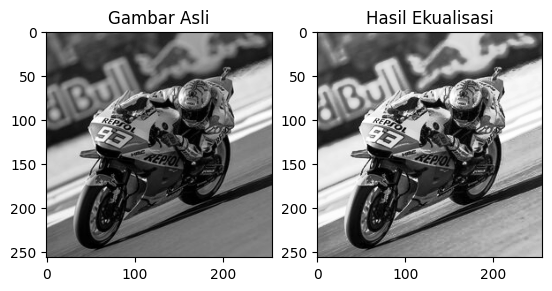

In [33]:
plt.subplot(1,2,1)
plt.title("Gambar Asli")
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title("Hasil Ekualisasi")
plt.imshow(eq,cmap='gray')

pada fungsi diatas adalah untuk menampilkan dua gambar yaitu gambar asli dan gambar hasil ekualisasi dengan menggunakan subplot agar bisa dilalukan perbandingan antar keduanya.

In [34]:
def histoEkualisasi(img):
    x = np.zeros(256)
    for i in range(tinggi):
        for j in range(panjang):
            x[eq[i,j]]+=1
    abu = np.arange(256)
    plt.bar(abu, x)
    return x, abu

pada fungsi di atas merupakan fungsi untuk membuat atau menhitung histogram setelah ekualisasi dengan membuat array  kosong terlebih dahulu kemudian melakukan perulangan untuk melakukan perhitungan pada histogram normalisasi kemudian memvisualisasikan histogram hasil ekualisasi.

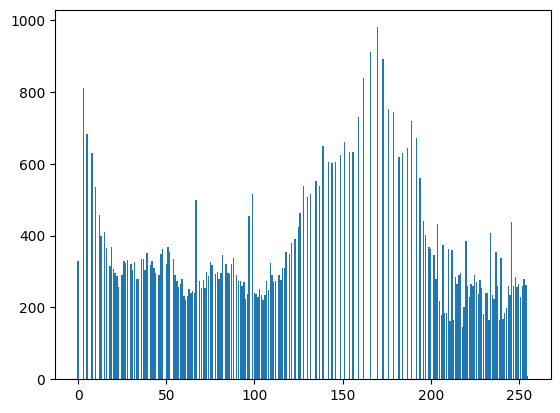

In [35]:
abu, x = histoEkualisasi(eq)
plt.show()

pada potongan code di atas merupakan untuk memanggil fungsi histoEkualisasi dan menampilkan histogram hasil ekualisasi citra tersebut.

NOMOR 3

 Lakukan spesifikasi/matching histogram pada citra 1 berdasarkan pada histogram citra 2. 

In [45]:
cdf1 = np.cumsum(eq)
cdf2 = np.cumsum(eq2)

cdf1_norm = ((cdf1 - cdf1.min()) / (cdf1.max() - cdf1.min())) * 255
cdf2_norm = ((cdf2 - cdf2.min()) / (cdf2.max() - cdf2.min())) * 255

mapping_table = np.zeros(256).astype(int)
for i in range(256):
    j = 0
    while j < 256 and cdf2_norm[j] < cdf1_norm[i]:
        j += 1
    mapping_table[i] = j


spesifikasi = np.zeros_like(gray)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        spesifikasi[i, j] = mapping_table[gray[i, j]]
    

pada fungsi diatas merupakan fungsi untuk menhistung CDF dan melakukan normalisasi setelah melakukan normalisasi akan dilakukan mapping table untuk melakukan pencocokkan instensitas piksel antar kedua citra dan terakhir melakukan spesifikasi piksel dengan menggunakan mapping table yang sudah dibuat

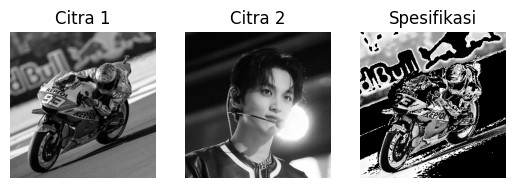

In [49]:
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Citra 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(spesifikasi, cmap='gray')
plt.title('Spesifikasi')
plt.axis('off')

plt.show()

menampilkan gambar hasil dari spesifikasi histogram dari citra 1 dengan citra 2